In [1]:
#import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()
#Since all columns aren't reflected, this means some columns have categorical data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#to visualise the categorical data, we shall use bar plots to draw inferences
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [11]:
from matplotlib import style

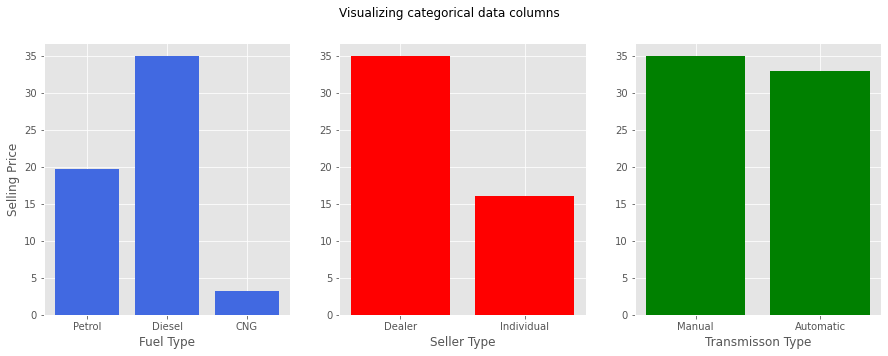

In [12]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
#graph 1
plt.subplot(1,3,1)
plt.bar(fuel_type, selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
#graph 2
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
#graph 3
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color="green")
plt.xlabel("Transmisson Type")
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

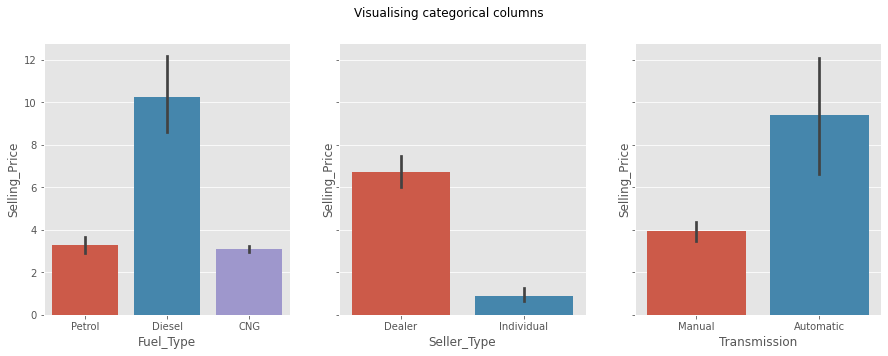

In [13]:
fig, axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualising categorical columns')
sns.barplot(x=fuel_type,y=selling_price,ax=axes[0])
sns.barplot(x=seller_type,y=selling_price,ax=axes[1])
sns.barplot(x=transmission_type,y=selling_price,ax=axes[2])
#for seeing mean of values

In [14]:
#We must convert our categorical data into numerical data for proper analysis
car_data = pd.get_dummies(car_data, columns=['Seller_Type','Transmission'], drop_first=True)
#this was for columns with only 2 categories. for column with three categories, we shall encode manually
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

In [15]:
#checking our encoding
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


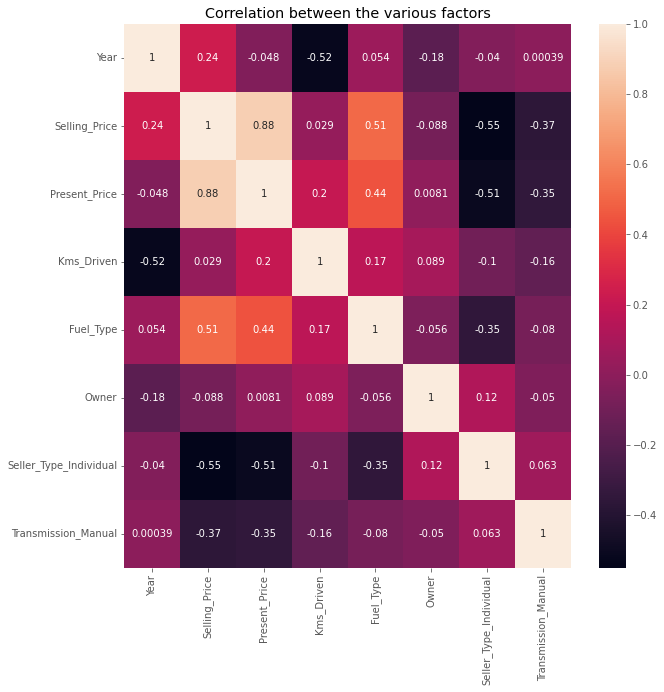

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the various factors')
plt.show()


<AxesSubplot:title={'center':'Correlation between Selling Price and Present price'}, xlabel='Present_Price', ylabel='Selling_Price'>

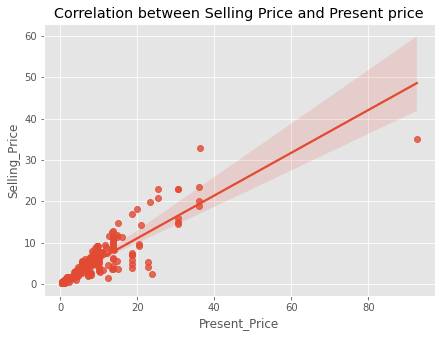

In [17]:
fog=plt.figure(figsize=(7,5))
# we see that selling price and present are highly correlated
plt.title('Correlation between Selling Price and Present price')
sns.regplot(x='Present_Price', y='Selling_Price', data =car_data)


In [21]:
x = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [22]:
print('Shape of X:', x.shape)
print('Shape of Y:', y.shape)

Shape of X: (301, 7)
Shape of Y: (301,)


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
print('Shape of xtrain:', xtrain.shape)
print('Shape of ytrain:', ytrain.shape)
print('Shape of xtest:', xtest.shape)
print('Shape of ytest:', ytest.shape)

Shape of xtrain: (210, 7)
Shape of ytrain: (210,)
Shape of xtest: (91, 7)
Shape of ytest: (91,)


In [25]:
scaler = StandardScaler()

In [29]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [30]:
model = LinearRegression()

In [31]:
model.fit(xtrain, ytrain)

LinearRegression()

In [32]:
pred = model.predict(xtest)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
#to check model accuracy, let us calculate some metrics
print("Mean Abs Error: ", (metrics.mean_absolute_error(pred, ytest)))
print("Mean Sqrd Error: ", (metrics.mean_squared_error(pred, ytest)))
print("r2 score: ", (metrics.r2_score(pred, ytest)))

Mean Abs Error:  1.231953300876688
Mean Sqrd Error:  3.4579538458337935
r2 score:  0.8528582949898236


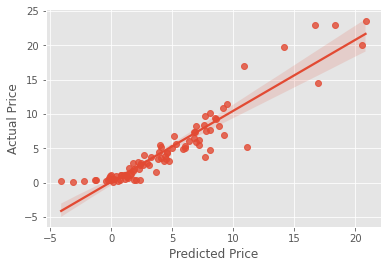

In [44]:
#a plot to compare predictions against actual values 
sns.regplot(x=pred,y=ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()